# Python Solutions to Tutorial 08

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#url = 'https://raw.githubusercontent.com/APS1040/Tutorials/main/Tutorial08_data.csv'
#df = pd.read_csv(url)

df = pd.read_csv('Tutorial08_data.csv')
df.head()

,Measurement,Temperature,sample,xi
0,1,953,1.0,9.45
1,2,945,2.0,7.99
2,3,972,3.0,9.29
3,4,980,4.0,11.66
4,5,975,5.0,12.16


## 1.	Eighty measurements of the temperature reading from a chemical process in °C are presented in the dataset. One measurement is taken every two minutes. The target value for the mean is 950. Set up MR and I charts. Is the process in control? 

First we set up the MR chart:

In [2]:
Rs = []
Rs.append(0) # set first entry to 0 so the indices do not mix later
for n in range(1,80):
    R = np.abs(df['Temperature'][n]-df['Temperature'][n-1])
    Rs.append(R)
    n += 1
CL_R = np.sum(Rs)/79
UCL_R = 3.267 * CL_R 
LCL_R = 0
print(CL_R, UCL_R, LCL_R)

12.860759493670885 42.01610126582278 0


In [3]:
for n in range(1,80):
    if(Rs[n-1] > UCL_R):
         print(n, 'is out of control')
    n += 1

MR is in control, so we proceed to build the I chart:

In [4]:
CL_x_bar = df['Temperature'].mean()
UCL_x_bar = CL_x_bar + 2.66 * CL_R # E2
LCL_x_bar = CL_x_bar - 2.66 * CL_R # E2
print(CL_x_bar, UCL_x_bar, LCL_x_bar)
for n in range(1,80):
    if(df['Temperature'][n-1] > UCL_x_bar or df['Temperature'][n-1]<LCL_x_bar ):
         print(n, 'is out of control')
    n += 1

951.3125 985.5221202531645 917.1028797468355


I chart is also in control, so the process is in control

## 2.	Based on the data and the control charts, what is the estimate of the process mean?

In [5]:
print("The estimate of the process mean is: ", CL_x_bar) 

The estimate of the process mean is:  951.3125


## 3.	Based on the data and the control charts, what is the estimate of the process standard deviation?

In [6]:
sigma = CL_R/1.128
print("The estimate of the process standard deviation is: ", sigma)

The estimate of the process standard deviation is:  11.401382529850077


## 4. 	Set up a tabular two-sided CUSUM chart for detecting a shift from μ_0 to μ_0+1.0 σ for this process, using standardized values h = 4.77 and k = 0.5.  Does the process appear to be in-control? (Use the estimated values of μ_0 and σ_0).

In [7]:
mu0 = CL_x_bar
delta = 1
k = 0.5
h = 4.77
K = k*sigma
H = h*sigma

ci_p = []
ci_n = []

for n in range(0,80):
    if n==0:
        ci_p.append(max(0,df['Temperature'][n] - mu0 - K ))
        ci_n.append(max(0,-df['Temperature'][n] + mu0 - K ))
    else:
        ci_p.append(max(0,df['Temperature'][n] - mu0 - K + ci_p[n-1]))
        ci_n.append(max(0,-df['Temperature'][n] + mu0 - K + ci_n[n-1]))

    
for n in range(0,80):
    if(ci_p[n] > H ):
         print(n+1, 'is out of control: positive part')
    if(ci_n[n] > H ):
         print(n+1, 'is out of control: negative part')



5 is out of control: positive part
6 is out of control: positive part
7 is out of control: positive part
8 is out of control: positive part
9 is out of control: positive part
36 is out of control: negative part


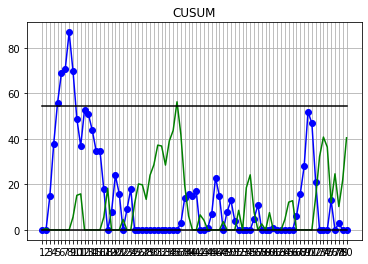

In [8]:
m=80
ucl_line = np.full(m,H) # create an array with all elements equal to the UCL
lcl_line = np.full(m,0) # create an array with all elements equal to the UCL
plt.plot(ci_p,marker="o",color='b')
plt.plot(ci_n,color='g')
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')

# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) ,

plt.grid(True)
plt.title('CUSUM')
plt.show()

process is out of control 

## 5. 	Considering the first point lying outside the control limits, what is the estimate of the shifted mean (μ_1) for that sample?

5 is the first point out of control. The latest zero before 5 was at 2. therefore, $\mu_1=\mu0+ci_p(4)/(5-2)+K$

In [9]:
mu1 = mu0 + ci_p[4]/3+K
print(mu1)

975.6666666666666


## 6. 	Assume that the original value of the standard deviation (σ_0) for the temperature reading is known to be 8.  Develop CUSUM charts for mean and variance. What can we conclude about this process?

First calculate the standardized values to be used in mean and variance charts

In [10]:
sigma0 = 8
mu0 = CL_x_bar
df['z'] = (df['Temperature']-mu0)/sigma0
df['v'] = (np.sqrt(np.abs(df['z']))-0.822)/0.349

Set up the mean chart

In [11]:
zi_p = []
zi_n = []

for n in range(0,80):
    if n==0:
        zi_p.append(max(0,df['z'][n] - k ))
        zi_n.append(max(0,-df['z'][n] - k ))
    else:
        zi_p.append(max(0,df['z'][n] - k + zi_p[n-1]))
        zi_n.append(max(0,-df['z'][n] - k + zi_n[n-1]))
    n += 1
    
for n in range(0,80):
    if(zi_p[n] > h ):
         print(n+1, 'is out of control: positive part')
    if(zi_n[n] > h ):
         print(n+1, 'is out of control: negative part')
    n += 1

4 is out of control: positive part
5 is out of control: positive part
6 is out of control: positive part
7 is out of control: positive part
8 is out of control: positive part
9 is out of control: positive part
10 is out of control: positive part
11 is out of control: positive part
12 is out of control: positive part
13 is out of control: positive part
14 is out of control: positive part
15 is out of control: positive part
16 is out of control: positive part
17 is out of control: positive part
20 is out of control: positive part
21 is out of control: positive part
23 is out of control: positive part
24 is out of control: positive part
30 is out of control: negative part
31 is out of control: negative part
32 is out of control: negative part
33 is out of control: negative part
34 is out of control: negative part
35 is out of control: negative part
36 is out of control: negative part
37 is out of control: negative part
38 is out of control: negative part
70 is out of control: positive par

Now set up the variance chart

In [12]:
vi_p = []
vi_n = []

for n in range(0,80):
    if n==0:
        vi_p.append(max(0,df['v'][n] - k ))
        vi_n.append(max(0,-df['v'][n] - k ))
    else:
        vi_p.append(max(0,df['v'][n] - k + vi_p[n-1]))
        vi_n.append(max(0,-df['v'][n] - k + vi_n[n-1]))
    n += 1
    
for n in range(0,80):
    if(vi_p[n] > h ):
         print(n+1, 'is out of control: positive part')
    if(vi_n[n] > h ):
         print(n+1, 'is out of control: negative part')
    n += 1

5 is out of control: positive part
6 is out of control: positive part
7 is out of control: positive part
8 is out of control: positive part
9 is out of control: positive part
10 is out of control: positive part
11 is out of control: positive part
12 is out of control: positive part
13 is out of control: positive part
14 is out of control: positive part
15 is out of control: positive part
16 is out of control: positive part
17 is out of control: positive part
18 is out of control: positive part
19 is out of control: positive part
20 is out of control: positive part
21 is out of control: positive part
22 is out of control: positive part
23 is out of control: positive part
24 is out of control: positive part
25 is out of control: positive part
26 is out of control: positive part
27 is out of control: positive part
28 is out of control: positive part
29 is out of control: positive part
30 is out of control: positive part
31 is out of control: positive part
32 is out of control: positive pa

In the 5th sample, both the mean and the variance are out-of-bounds and this means that there was a shift in the value of mu in that point.

## 7.	Assume that the data was taken from a process considered in-control with mean 10 and standard deviation 1.25. The manager believes something may have happened that might have caused the process to go out of control. The manager wishes to use control charts to determine if and when the process mean shifted by 0.5 σ. Set up a CUSUM chart for the mean. Is the process in control?

In [13]:
mu0 = 10
sigma = 1.25
delta = 0.5
k = 0.25
h = 8.01
K = k*sigma
H = h*sigma
print("UCL=", H)

UCL= 10.0125


In [14]:
ci_p = []
ci_n = []

for n in range(0,30):
    if n==0:
        ci_p.append(max(0,df['xi'][n] - mu0 - K ))
        ci_n.append(max(0,-df['xi'][n] + mu0 - K ))
    else:
        ci_p.append(max(0,df['xi'][n] - mu0 - K + ci_p[n-1]))
        ci_n.append(max(0,-df['xi'][n] + mu0 - K + ci_n[n-1]))
    n += 1
    
for n in range(0,30):
    if(ci_p[n] > H ):
         print(n+1, 'is out of control: positive part')
    if(ci_n[n] > H ):
         print(n+1, 'is out of control: negative part')
    n += 1

28 is out of control: positive part
29 is out of control: positive part
30 is out of control: positive part


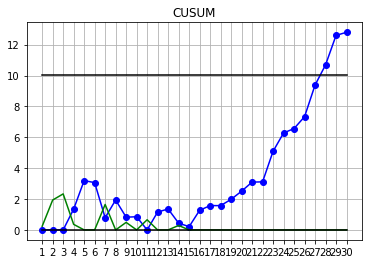

In [15]:
m=30
ucl_line = np.full(m,H) # create an array with all elements equal to the UCL
lcl_line = np.full(m,0) # create an array with all elements equal to the UCL
plt.plot(ci_p,marker="o",color='b')
plt.plot(ci_n,color='g')
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')

# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) ,

plt.grid(True)
plt.title('CUSUM')
plt.show()

## 8.	If the process is out-of-control, when does the chart detect it?

Yes, the process is out of control. It detects at 28th point

## 9.	If the process is out-of-control, what is the estimate of the shifted mean?

In [16]:
mu1 = mu0 + ci_p[27]/(28-11)+K
print(mu1)

10.941176470588236
